In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

travel_time_data = pd.read_csv('travel_time_train_data.csv')
travel_time_data.head()

,distance,travel_time
0,64.20,1.00
1,68.72,1.00
2,85.79,1.32
3,99.96,1.65
4,103.55,1.45


In [13]:
max(travel_time_data[' travel_time'])

24.95

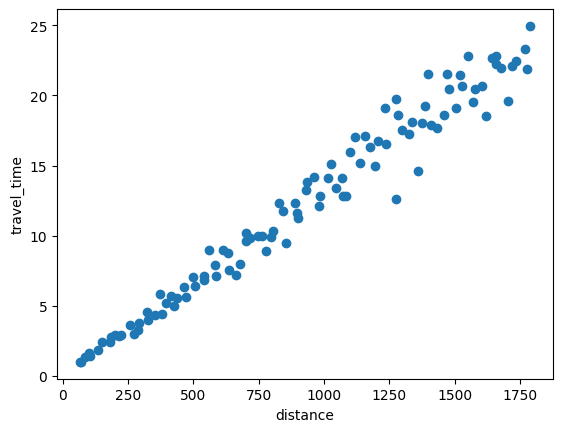

In [16]:
X = travel_time_data['distance']
y = travel_time_data['travel_time']
plt.scatter(X, y)
# plt.ylim(0, 25)
plt.xlabel('distance')
plt.ylabel('travel_time')
plt.show()

In [18]:
travel_time_data.shape

(106, 2)

In [19]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(travel_time_data, 
                                         test_size=0.2,
                                         random_state=42)

In [24]:
X_train = train_data['distance'].to_numpy()
y_train = train_data['travel_time'].to_numpy()

X_test = test_data['distance'].to_numpy()
y_test = test_data['travel_time'].to_numpy()

print(f"{travel_time_data.shape = }")
print(f"{X_train.shape = }, {y_train.shape = }")
print(f"{X_test.shape = }, {y_test.shape = }")

travel_time_data.shape = (106, 2)
X_train.shape = (84,), y_train.shape = (84,)
X_test.shape = (22,), y_test.shape = (22,)


In [25]:
X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
print(f'{X_train.shape = }')
print(f'{X_test.shape = }')

X_train.shape = (84, 1)
X_test.shape = (22, 1)


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_test_predicted = model.predict(X_test)

header = f"X_test\ty_test\ty_test_predicted"
print(header, '\n', '-'*len(header), sep='')
for i in range(len(y_test)):
    print(f"{X_test[i]}\t{y_test[i]}\t{round(y_test_predicted[i], 2)}")

X_test	y_test	y_test_predicted
------------------------------
[1704.13]	19.59	22.6
[215.71]	2.84	2.89
[103.55]	1.45	1.4
[1386.6]	19.25	18.39
[1658.41]	22.79	21.99
[1117.48]	17.03	14.83
[540.37]	6.87	7.19
[586.73]	7.09	7.8
[1577.06]	20.44	20.91
[224.27]	2.95	3.0
[827.9]	12.32	10.99
[747.45]	9.95	9.93
[64.2]	1.0	0.88
[1336.06]	18.08	17.72
[352.02]	4.36	4.69
[1100.47]	15.97	14.6
[1158.57]	17.11	15.37
[1359.12]	14.6	18.03
[963.75]	14.16	12.79
[778.54]	8.93	10.34
[256.94]	3.61	3.43
[1373.93]	18.01	18.22


Text(0, 0.5, 'travel_time')

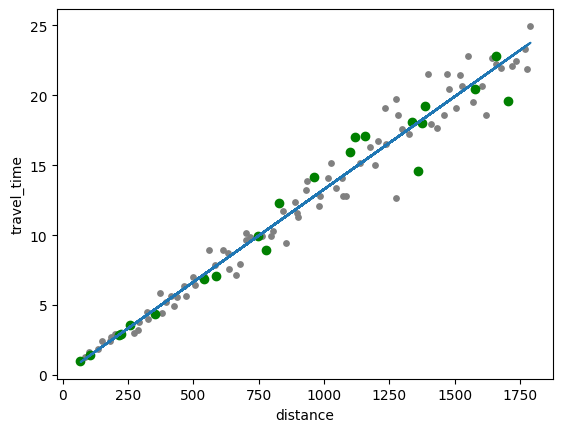

In [31]:
y_train_predicted = model.predict(X_train)

plt.scatter(X_train, y_train, c='grey', s=15)
plt.scatter(X_test, y_test, c='green')
plt.plot(X_train, y_train_predicted)

plt.xlabel('distance')
plt.ylabel('travel_time')

In [32]:
from sklearn.metrics import mean_squared_error as mse

train_rmse = mse(y_train, y_train_predicted, squared=False)
test_rmse = mse(y_test, y_test_predicted, squared=False)

print(f'{train_rmse = }, {test_rmse = }')

train_rmse = 1.1363686081901485, test_rmse = 1.3260535177267117


In [33]:
differences = y_test - y_test_predicted
squared_diffs = differences**2

In [34]:
header = f"y_test\ty_test_predicted  differences\tsquared_diffs"
print(header, '\n', '-'*len(header), sep='')
for i in range(len(y_test)):
    print(f"{y_test[i]}\t{y_test_predicted[i] :.1f}", end='')
    print(f"\t\t  {differences[i] :.4f}\t{squared_diffs[i] :.4f}")

y_test	y_test_predicted  differences	squared_diffs
--------------------------------------------------
19.59	22.6		  -3.0061	9.0368
2.84	2.9		  -0.0464	0.0022
1.45	1.4		  0.0488	0.0024
19.25	18.4		  0.8586	0.7372
22.79	22.0		  0.7993	0.6389
17.03	14.8		  2.2023	4.8502
6.87	7.2		  -0.3156	0.0996
7.09	7.8		  -0.7095	0.5033
20.44	20.9		  -0.4735	0.2242
2.95	3.0		  -0.0497	0.0025
12.32	11.0		  1.3270	1.7608
9.95	9.9		  0.0223	0.0005
1.0	0.9		  0.1199	0.0144
18.08	17.7		  0.3579	0.1281
4.36	4.7		  -0.3314	0.1098
15.97	14.6		  1.3676	1.8703
17.11	15.4		  1.7382	3.0214
14.6	18.0		  -3.4275	11.7476
14.16	12.8		  1.3680	1.8715
8.93	10.3		  -1.4094	1.9865
3.61	3.4		  0.1776	0.0316
18.01	18.2		  -0.2136	0.0456


In [35]:
test_mse = np.mean((y_test - y_test_predicted) ** 2)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

1.3260535177267117


In [37]:
distance_data = pd.read_csv('travel_time_test.csv')
distance_data.head()

,distance
0,64.20
1,87.57
2,123.50
3,156.52
4,178.96


In [38]:
X = distance_data.to_numpy()
y = model.predict(X)
y[:5] 

array([0.8800933 , 1.18955988, 1.66534653, 2.10259884, 2.39975032])

In [39]:
np.savetxt('Гнусов-М.Е-travel_time_predicts.csv', y, 
           header='travel_time', 
           delimiter=',', 
           fmt='%.2f', 
           comments='')

In [41]:
a = model.intercept_
b = model.coef_ #или b = model.coef_[0]
print(f'{a = }, {b = }') 

a = 0.029954050707852176, b = 0.01324204439626702
